In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import os
import numpy as np
import seaborn as sns
import pandas as pandas
import matplotlib.pyplot as plt

import sklearn.metrics

import tissue.api as tissue

import scanpy as sc
sc.settings.set_figure_params(dpi=80)

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

In [3]:
# user = "david.fischer"
# user = "ina"
user = "mayar.ali"

if user == "david.fischer":
    base_path_gcn = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/schuerch/"
    base_path_mi = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/schuerch/"
    base_path_reg = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/schuerch/"
elif user == "ina":
    base_path_gcn = '../../results/GCN/basel_zurich/'
    base_path_reg = '../../results/REG/basel_zurich/'
    
elif user == "mayar.ali":
    base_path_gcn = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/schuerch/"
    base_path_mi = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/schuerch/"
    base_path_reg = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/schuerch/"


In [44]:
dir_figures="/lustre/groups/ml01/workspace/mayar.ali/tissue/figures/schuerch/"

In [5]:
data_key='sch'
group_name='Group'
feature_space='types'

### 1. Molecular and cell types models comparison


A. Loading trained models

In [6]:
source_path={
        # types
        "2206020924_GCNSS_SPECTRAL_GROUP_TYPE_schuerch_RADIUS_MULTITASK": base_path_gcn,
        "2206020925_GCN_SPECTRAL_GROUP_TYPE_schuerch_RADIUS_NONE": base_path_gcn,
        "2206091733_GCN_NONE_GRADE_TYPE_schuerch_RADIUS_NONE": base_path_gcn,
        "2206020926_MI_NONE_GROUP_TYPE_schuerch_RADIUS_NONE": base_path_mi,
        "2206020933_REG_GRADE_TYPE_schuerch_": base_path_reg,   
        
        # molecular
        "2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK": base_path_gcn,
        "2205170846_GCNSS_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_MULTITASK": base_path_gcn,
        "2205061328_GCN_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_NONE": base_path_gcn,
        "2205090901_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE": base_path_gcn,
        "2205160858_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE": base_path_gcn,
        "2205170856_MI_NONE_GRADE_STANDARD_schuerch_RADIUS_NONE": base_path_mi,
        "2205181007_REG_GRADE_STANDARD_schuerch_": base_path_reg,
    }

gs_ids=[
        # types
        "2206020924_GCNSS_SPECTRAL_GROUP_TYPE_schuerch_RADIUS_MULTITASK",
        "2206020925_GCN_SPECTRAL_GROUP_TYPE_schuerch_RADIUS_NONE",
        "2206091733_GCN_NONE_GRADE_TYPE_schuerch_RADIUS_NONE",
        "2206020926_MI_NONE_GROUP_TYPE_schuerch_RADIUS_NONE",    
        "2206020933_REG_GRADE_TYPE_schuerch_",
        
        # molecular
        "2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK",
        "2205170846_GCNSS_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_MULTITASK",
        "2205061328_GCN_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_NONE",
        "2205090901_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE",
        "2205160858_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE",
        "2205170856_MI_NONE_GRADE_STANDARD_schuerch_RADIUS_NONE",
        "2205181007_REG_GRADE_STANDARD_schuerch_"
    ]

In [7]:
container = tissue.fits.GridSearchContainer(
    source_path=source_path,
    gs_ids=gs_ids,
)
container.load_gs()

loaded 2206020924_GCNSS_SPECTRAL_GROUP_TYPE_schuerch_RADIUS_MULTITASK: 128 runs with 6-fold cross validation
loaded 2206020925_GCN_SPECTRAL_GROUP_TYPE_schuerch_RADIUS_NONE: 120 runs with 6-fold cross validation
loaded 2206091733_GCN_NONE_GRADE_TYPE_schuerch_RADIUS_NONE: 4 runs with 6-fold cross validation
loaded 2206020926_MI_NONE_GROUP_TYPE_schuerch_RADIUS_NONE: 96 runs with 6-fold cross validation
loaded 2206020933_REG_GRADE_TYPE_schuerch_: 72 runs with 6-fold cross validation
loaded 2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK: 36 runs with 6-fold cross validation
loaded 2205170846_GCNSS_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_MULTITASK: 4 runs with 6-fold cross validation
loaded 2205061328_GCN_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_NONE: 36 runs with 6-fold cross validation
loaded 2205090901_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE: 36 runs with 6-fold cross validation
loaded 2205160858_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE: 36 runs with 6-fold cross v

B. Feature space comparison analysis

selected ['model_class']
means=model_class
GCN      0.604167
GCNSS    0.625000
MI       0.645833
MLP      0.578125
Name: test_Group_custom_categorical_acc, dtype: float64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MI_molecular v.s. MI_types: t-test independent samples, P_val=7.798e-02 stat=-1.964e+00
MLP_molecular v.s. MLP_types: t-test independent samples, P_val=5.447e-02 stat=-2.178e+00
GCN_molecular v.s. GCN_types: t-test independent samples, P_val=3.765e-02 stat=-2.395e+00
GCNSS_molecular v.s. GCNSS_types: t-test independent samples, P_val=4.419e-02 stat=-2.301e+00


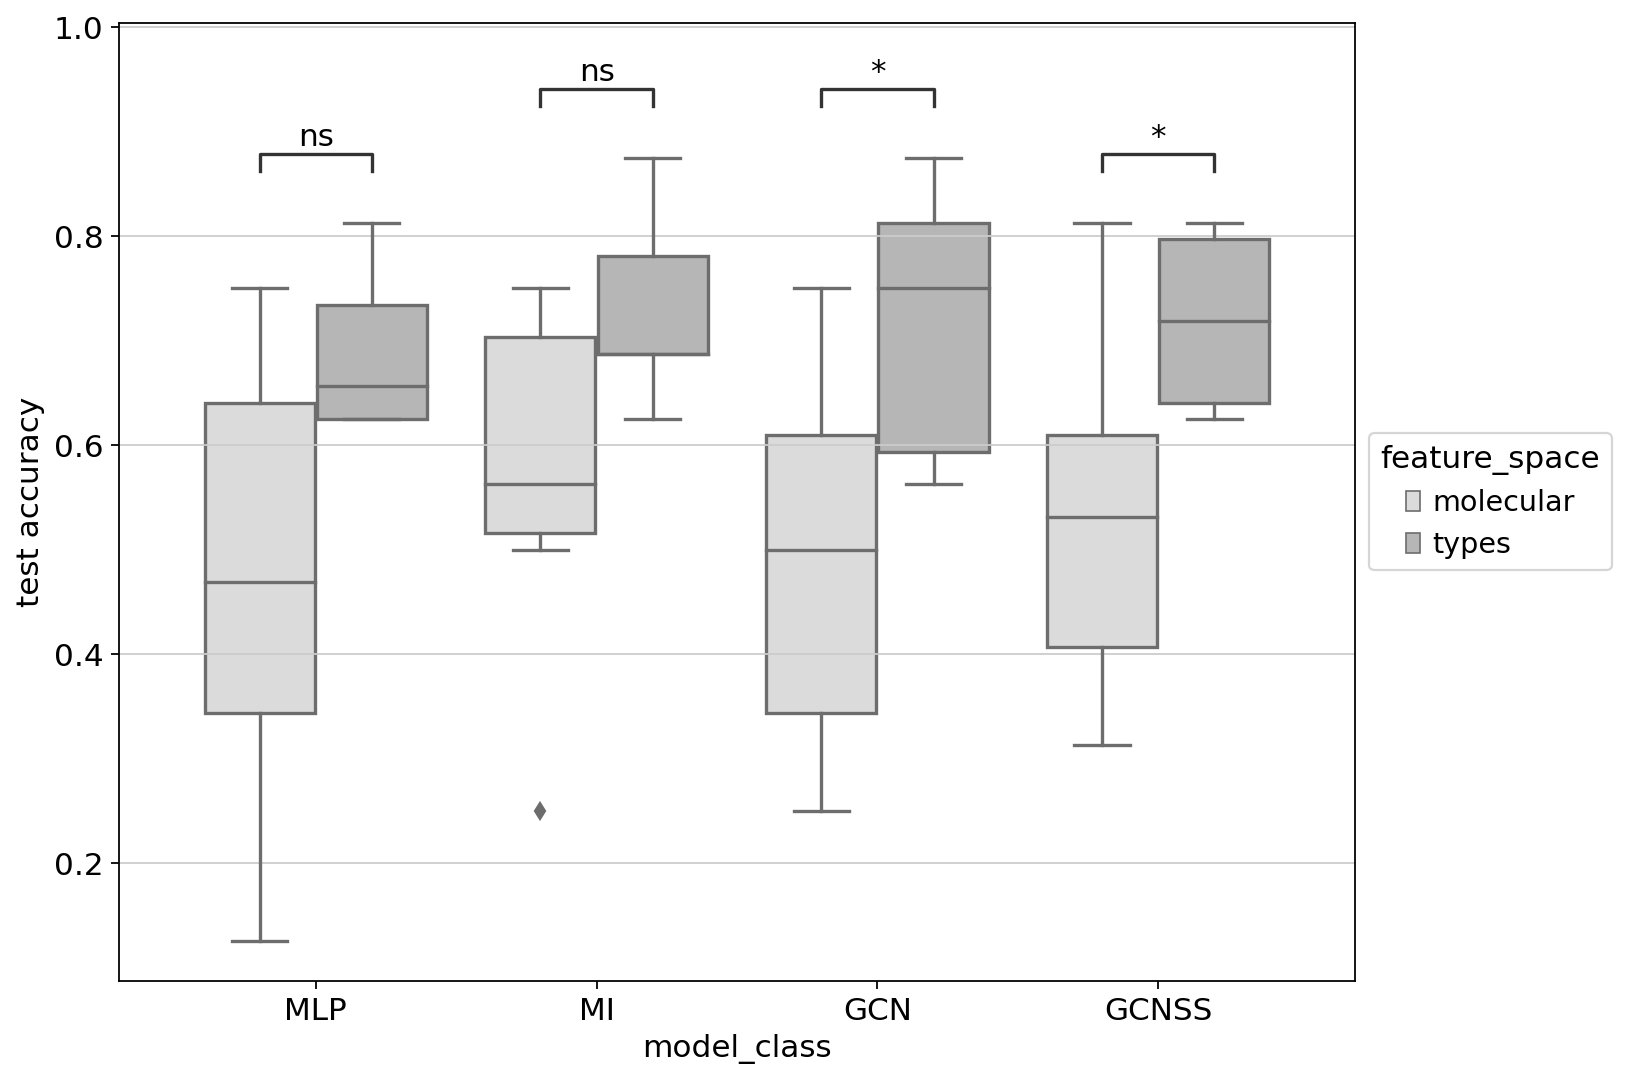

In [8]:
sns.set_palette("gray_r")
container.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    param_hue="feature_space",  
    param_x=['model_class'],
#     save=dir_figures+f"model_comaprison_accuracy_molecular_vs_types", 
    suffix=".pdf",
    panel_width = 10,
    panel_height = 7,
    show_swarm = False,
    ttest = True,
    feature_space = True,
)

### 2. Benchmarking cell type models

A. Loading trained models

In [9]:
source_path={
        "2206020924_GCNSS_SPECTRAL_GROUP_TYPE_schuerch_RADIUS_MULTITASK": base_path_gcn,
        "2206091733_GCN_NONE_GRADE_TYPE_schuerch_RADIUS_NONE": base_path_gcn,
        "2206020926_MI_NONE_GROUP_TYPE_schuerch_RADIUS_NONE": base_path_mi,
        "2206020933_REG_GRADE_TYPE_schuerch_": base_path_reg,   
        "2207290901_REGDISP_DISPERSION_MAXDIST1_GRADE_TYPE_binary": base_path_reg,
    }

gs_ids=[
        "2206020924_GCNSS_SPECTRAL_GROUP_TYPE_schuerch_RADIUS_MULTITASK",
        "2206091733_GCN_NONE_GRADE_TYPE_schuerch_RADIUS_NONE",
        "2206020926_MI_NONE_GROUP_TYPE_schuerch_RADIUS_NONE",    
        "2206020933_REG_GRADE_TYPE_schuerch_",
        "2207290901_REGDISP_DISPERSION_MAXDIST1_GRADE_TYPE_binary",

    ]

In [10]:
container_typ = tissue.fits.GridSearchContainer(
    source_path=source_path,
    gs_ids=gs_ids,
    
)
container_typ.load_gs()

loaded 2206020924_GCNSS_SPECTRAL_GROUP_TYPE_schuerch_RADIUS_MULTITASK: 128 runs with 6-fold cross validation
loaded 2206091733_GCN_NONE_GRADE_TYPE_schuerch_RADIUS_NONE: 4 runs with 6-fold cross validation
loaded 2206020926_MI_NONE_GROUP_TYPE_schuerch_RADIUS_NONE: 96 runs with 6-fold cross validation
loaded 2206020933_REG_GRADE_TYPE_schuerch_: 72 runs with 6-fold cross validation
loaded 2207290901_REGDISP_DISPERSION_MAXDIST1_GRADE_TYPE_binary: 12 runs with 6-fold cross validation


B. Model comparison analysis

selected ['model_class']
means=model_class
DISP     0.822917
GCN      0.718750
GCNSS    0.718750
MI       0.729167
MLP      0.687500
Name: test_Group_custom_categorical_acc, dtype: float64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MLP_types v.s. MI_types: t-test independent samples, P_val=4.257e-01 stat=-8.305e-01
MI_types v.s. DISP_types: t-test independent samples, P_val=8.276e-02 stat=-1.928e+00
MI_types v.s. GCN_types: t-test independent samples, P_val=8.802e-01 stat=1.547e-01
MI_types v.s. GCNSS_types: t-test independent samples, P_val=8.455e-01 stat=2.000e-01


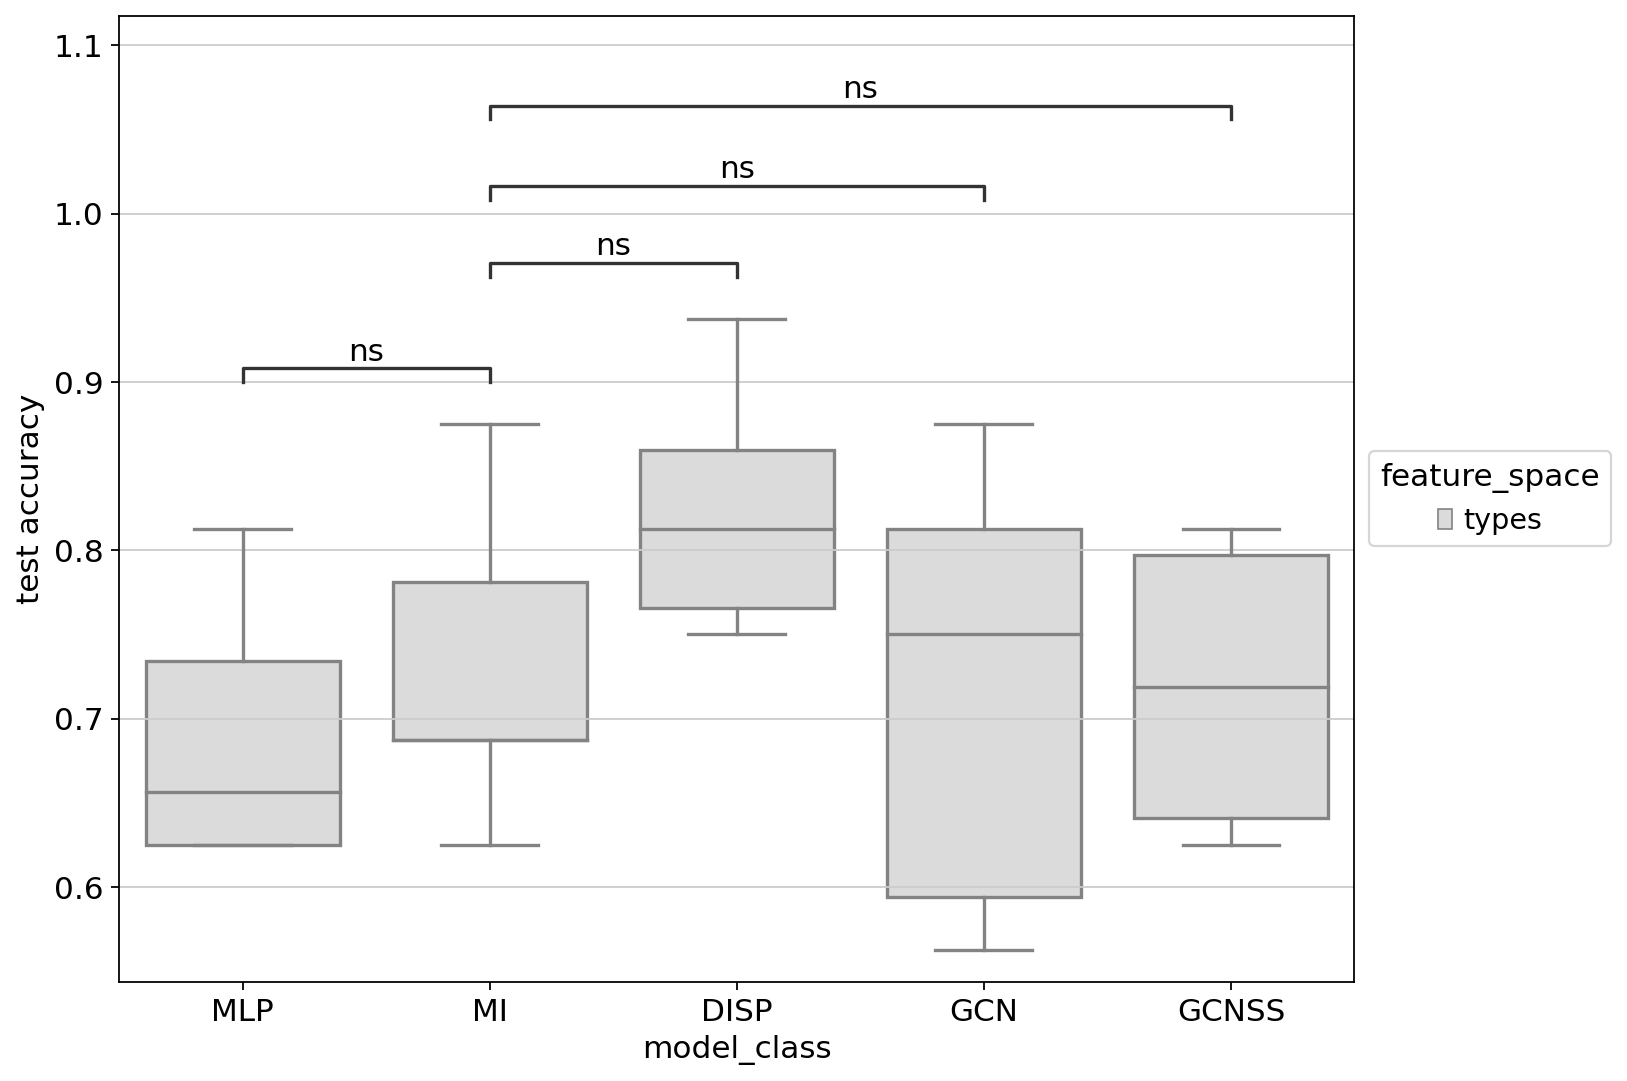

In [11]:
sns.set_palette('gray_r')
container_typ.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    param_hue="feature_space",  #  feature_space, depth_feature_embedding
    param_x=['model_class'],
#     save=dir_figures+f"model_comaprison_accuracy_{feature_space}_suppfig9a", 
    suffix=".pdf",
    panel_width = 10,
    panel_height = 7,
    show_swarm = False,
    dispersion=True,
    ttest = True,
    types = True,
)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MLP v.s. MI: t-test independent samples, P_val=8.970e-01 stat=-1.309e-01
MI v.s. DISP: t-test independent samples, P_val=5.486e-04 stat=-4.039e+00
MI v.s. GCN: t-test independent samples, P_val=4.150e-03 stat=-3.198e+00
MI v.s. GCNSS: t-test independent samples, P_val=9.915e-03 stat=-2.822e+00


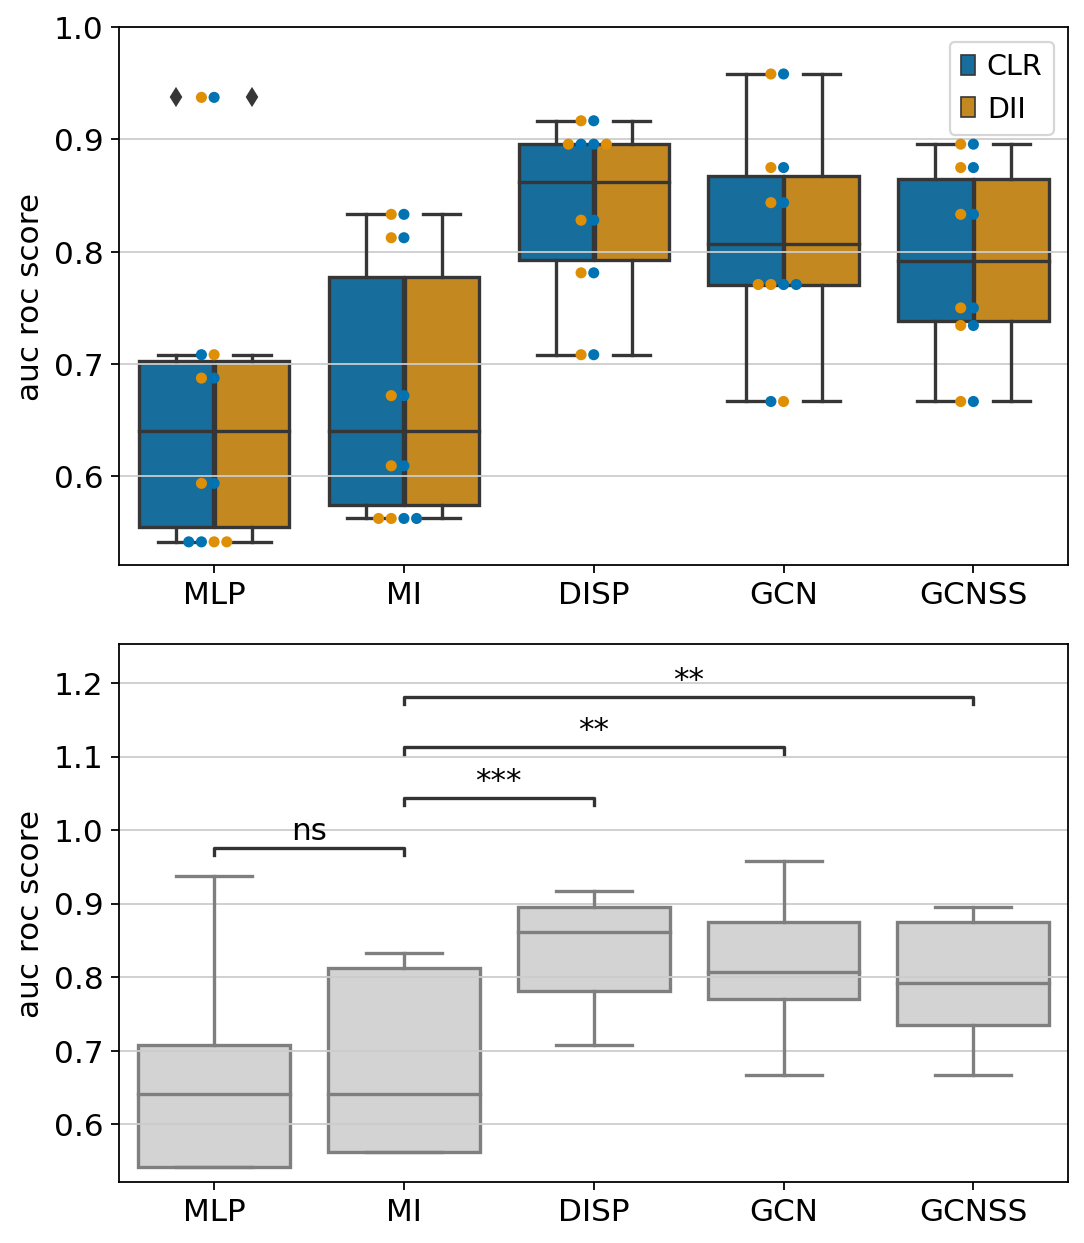

In [12]:
sns.set_palette('colorblind')
container_typ.plot_best_model_roc_auc(
    partition_show="test",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    suffix=".pdf",
    panel_width = 7,
    panel_height = 8,
    load_labels=[group_name],
    data_key=data_key,
    plot_all_groups=True,
    ttest=True,
    dispersion=True,
#     save=dir_figures+f"model_comparison_roc_auc_{feature_space}_fig2b"
)

### 3. Analysis on GCN SS

In [39]:
model_class="GCNSS"

A. Loading trained model

In [14]:
container_gcnss = tissue.fits.GridSearchContainer(
    source_path={
        "2206020924_GCNSS_SPECTRAL_GROUP_TYPE_schuerch_RADIUS_MULTITASK": base_path_gcn,
        
    },
    gs_ids=[
        "2206020924_GCNSS_SPECTRAL_GROUP_TYPE_schuerch_RADIUS_MULTITASK",
    ]
)
container_gcnss.load_gs()

loaded 2206020924_GCNSS_SPECTRAL_GROUP_TYPE_schuerch_RADIUS_MULTITASK: 128 runs with 6-fold cross validation


In [15]:
gs_id, model_id, cv = container_gcnss.get_best_model_id(partition_select='train')
container_gcnss.get_info(gs_id = gs_id, model_id=model_id, load_labels=[group_name])

B. GCN SS analysis

Confusion matrix on test set:


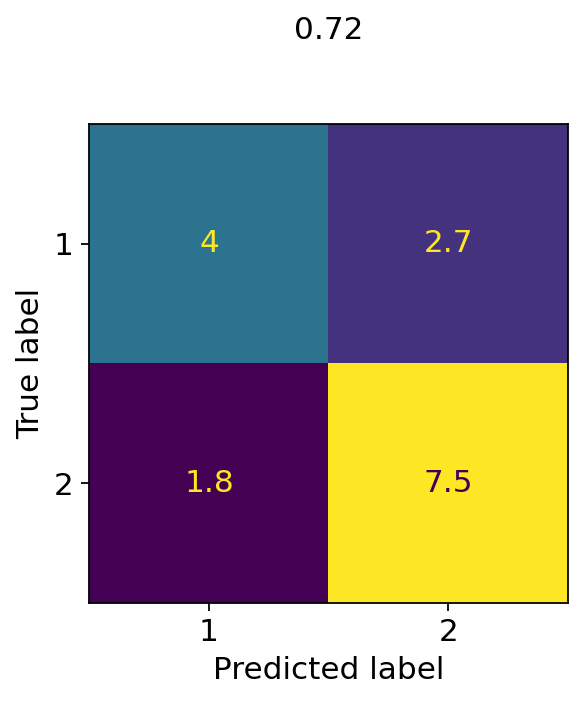

Confusion matrix on train set:


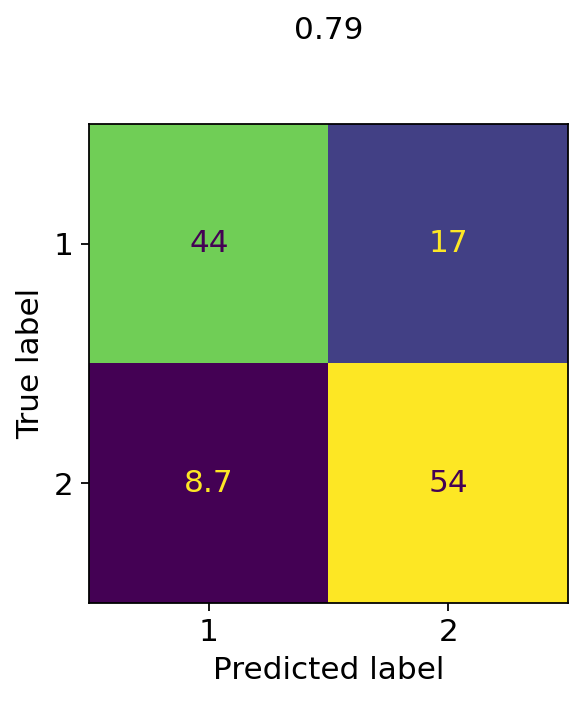


test
Group 1 : 0.6180555555555556
Group 2 : 0.7986111111111112
mean : 0.71875

train
Group 1 : 0.7188492063492063
Group 2 : 0.8606004901960783
mean : 0.7916666666666666


In [17]:
# plotting confusion metrices

sns.set_palette('colorblind')
print('Confusion matrix on test set:')
container_gcnss.plot_confusion_matrix(
    target_label=group_name,
    partition_show='test',
    mean_across_cv=True,
#     save=dir_figures+f"gcnss_analysis_confusion_mtx_test_{feature_space}", 
    x_ticks=['1', '2'],
)


print('Confusion matrix on train set:')
container_gcnss.plot_confusion_matrix(
    target_label=group_name,
    partition_show='train',
    mean_across_cv=True,
#     save=dir_figures+f"gcnss_analysis_confusion_mtx_train_{feature_space}", 
    x_ticks=['1', '2']
)


for partition in ['test', 'train']:
    print()
    print(partition)
    mean = []
    for grade in [0, 1]:
        acc = []
        for cv in ['cv0', 'cv1', 'cv2', 'cv3', 'cv4', 'cv5']:
            preds = np.argmax(container_gcnss.info[cv]['predictions'][partition][group_name], axis=1)
            true = np.argmax(container_gcnss.true_labels[cv][partition][group_name], axis=1)
            acc.append(np.mean(preds[true==grade] == true[true==grade]))
            if grade == 0:
                mean.append(np.mean(preds == true))
        mean_acc = np.mean(acc)
        print("Group", grade+1, ":", mean_acc)
    mean = np.mean(mean)
    print("mean :", mean)

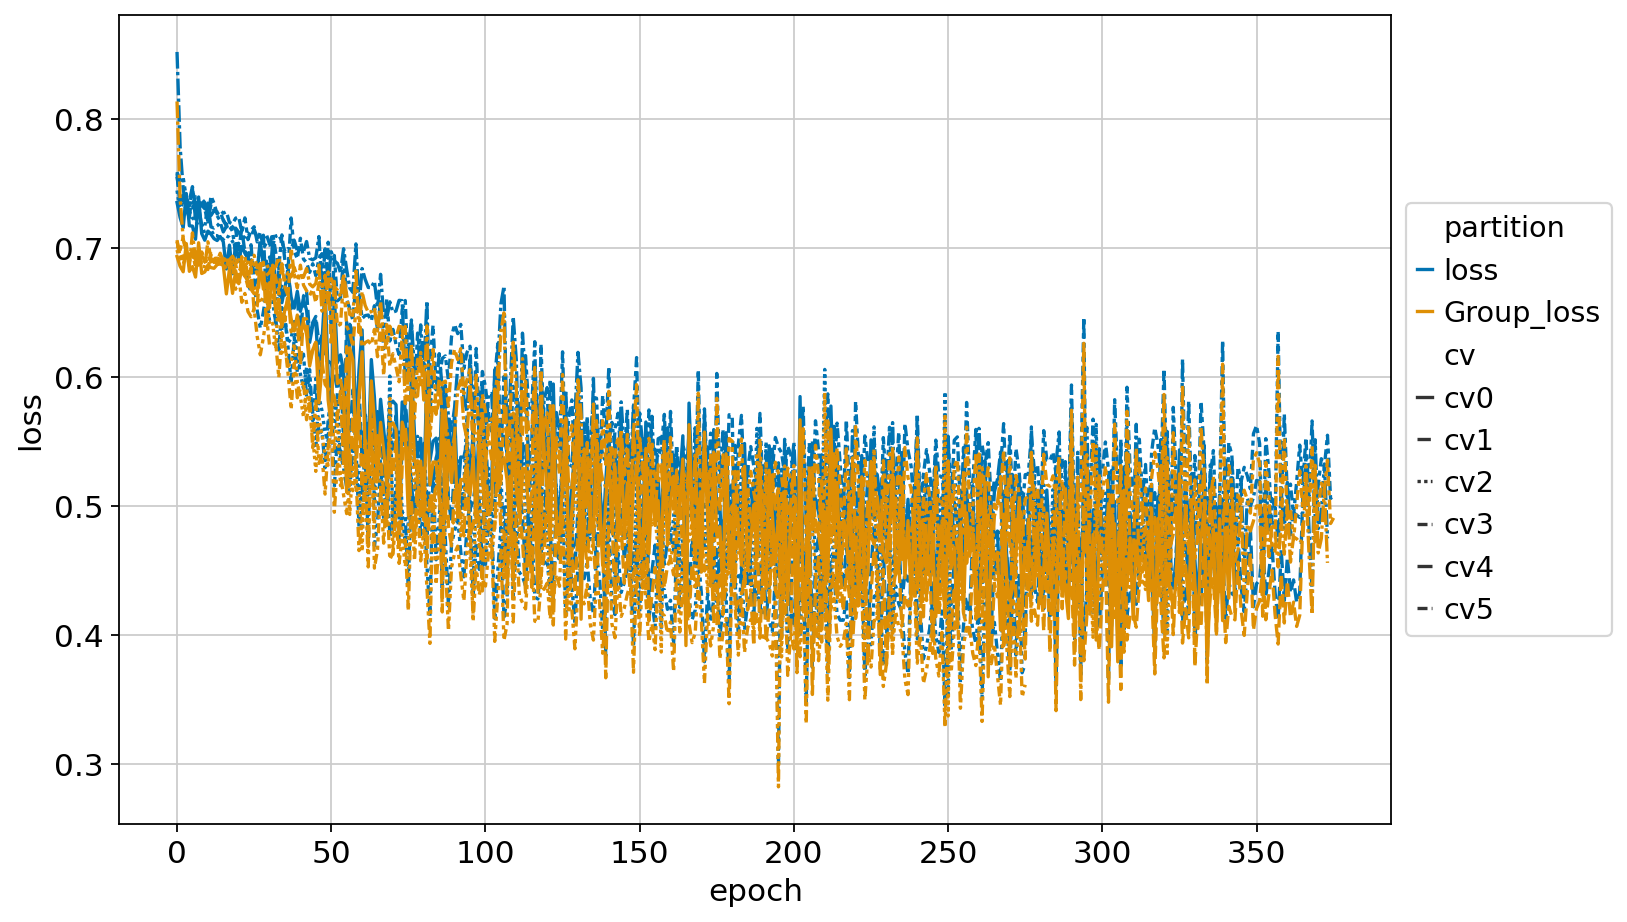

In [18]:
container_gcnss.plot_training_history(
    plot_metrics=['loss', f'{group_name}_loss'],
#     save=dir_figures+f"gcnss_analysis_training_history_curve_{feature_space}_suppfig5e", 
)

C. Analysing model decision boundary

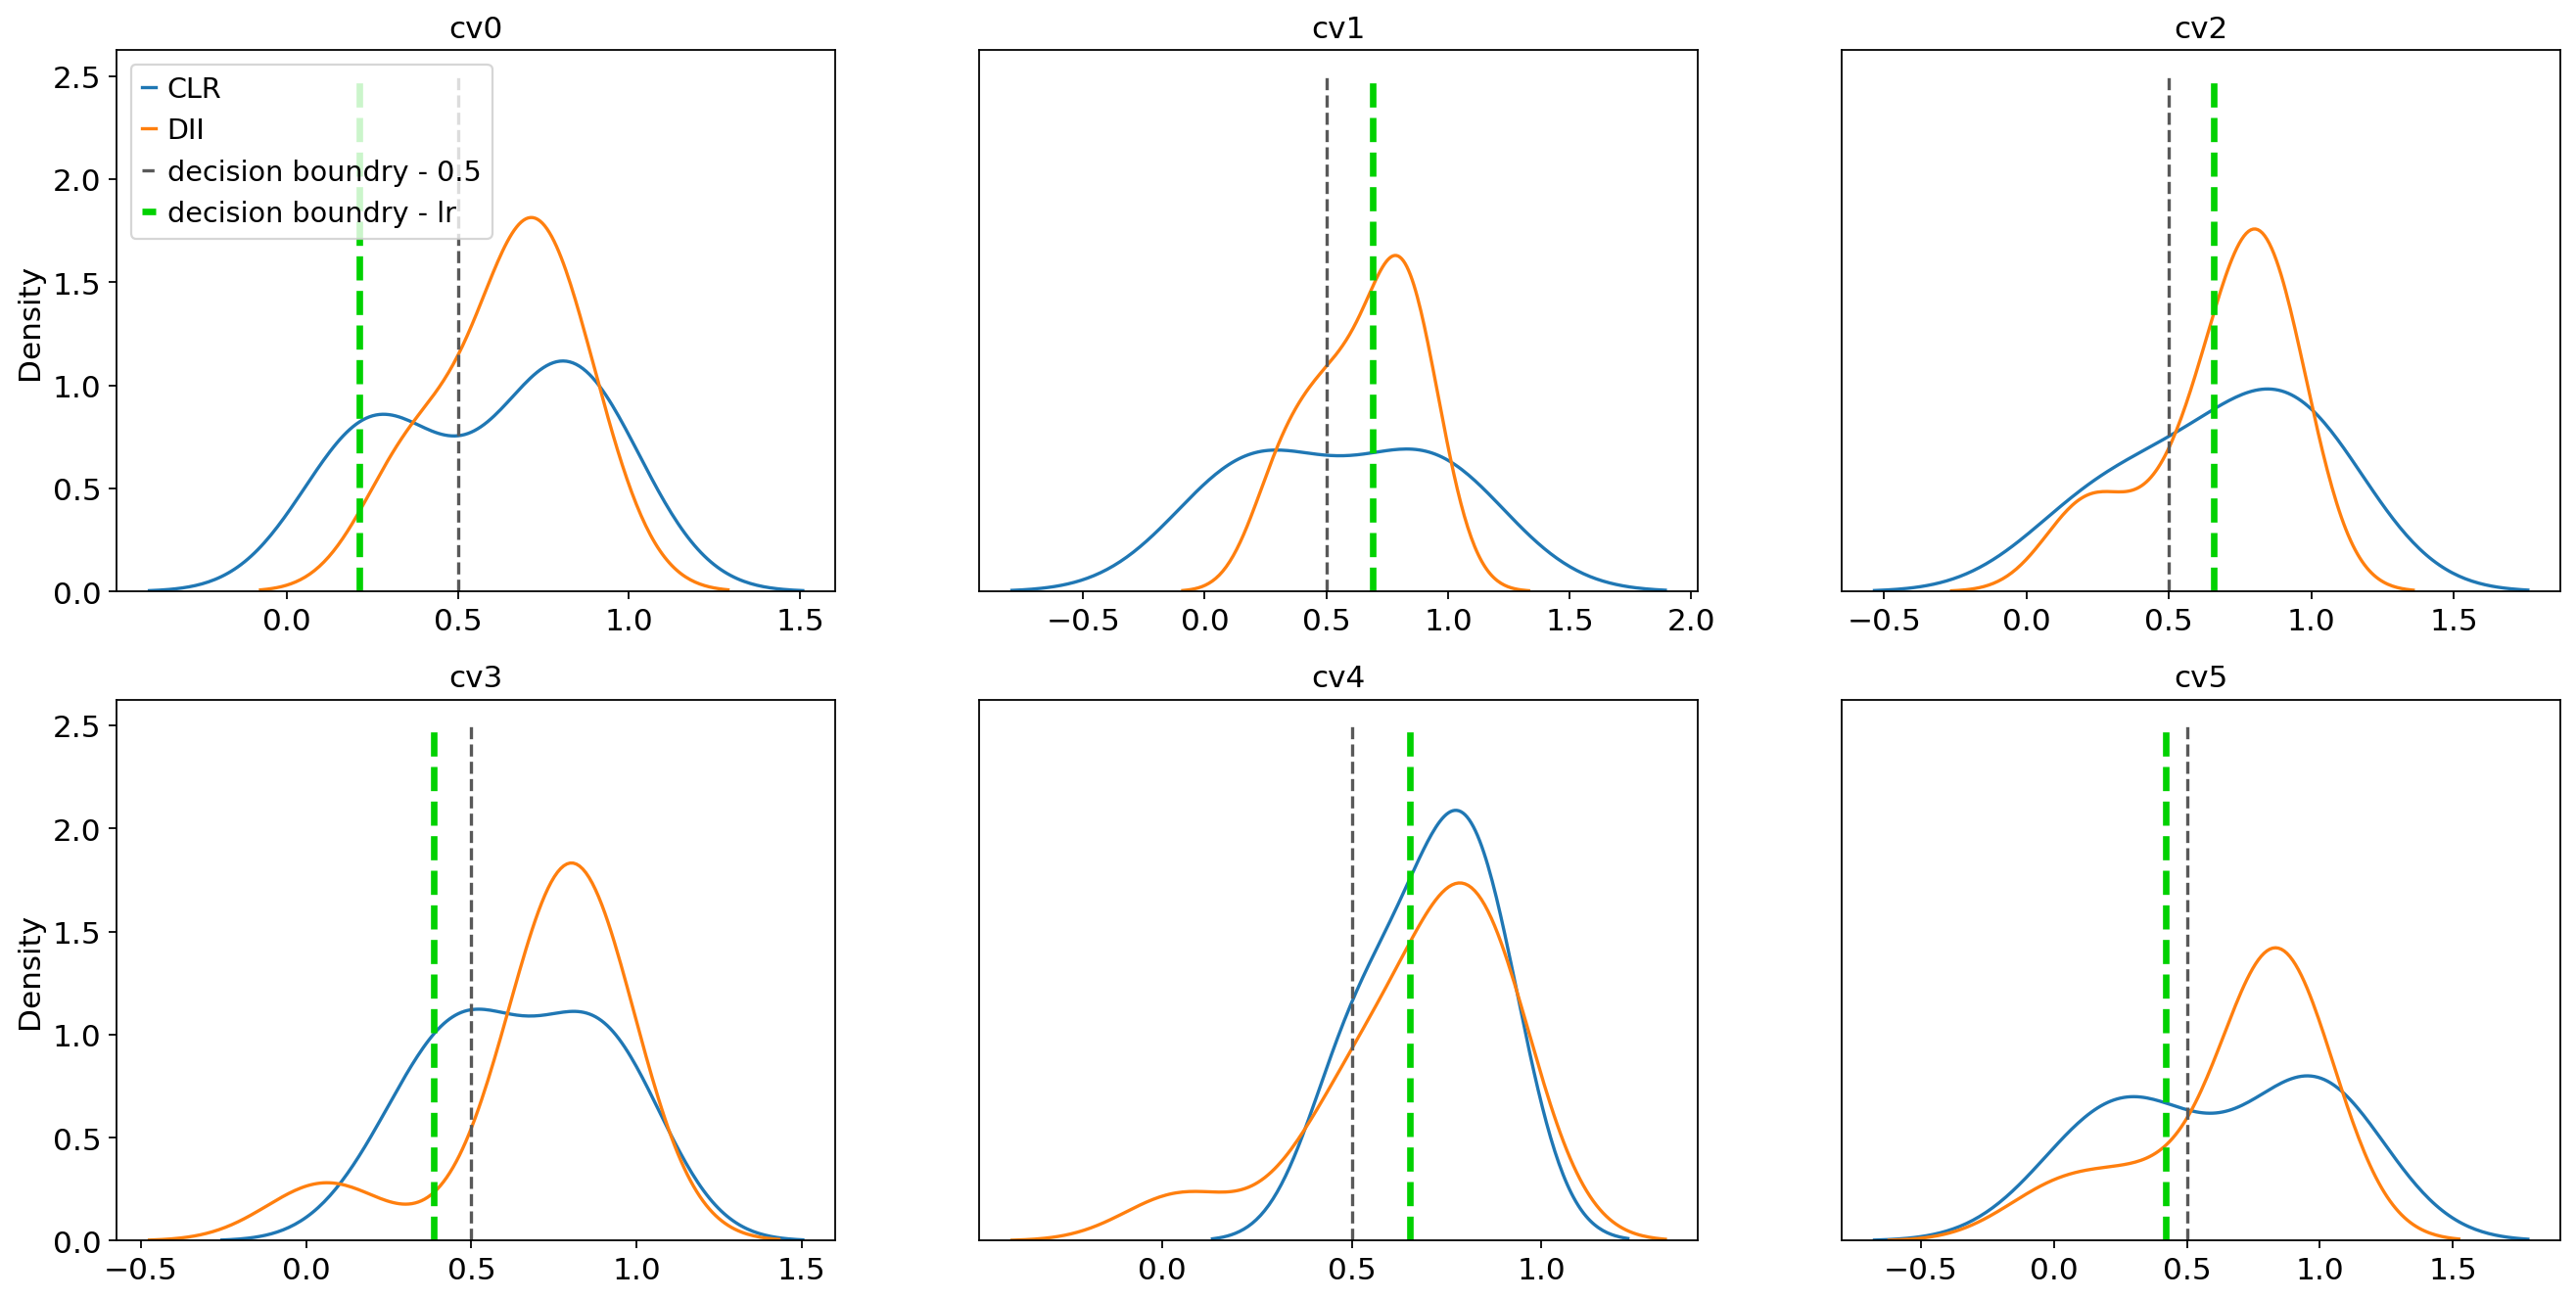

In [47]:
def h(theta, xi):
    """
    returns decision boundary
    """
    return 1/(1 + np.exp(-1*np.dot(xi, theta)))

plt.figure(figsize=(20,10))
for j, cv_id in enumerate(list(container_gcnss.info.keys())[:-1]):
    y_hat = np.transpose(container_gcnss.info[cv_id]['predictions']['test'][group_name])
    y_obs = np.transpose(container_gcnss.true_labels[cv_id]['test'][group_name])
    
    plt.subplot(2,3,j+1)
    sns.distplot(y_hat[0][y_obs[0]==1], hist=False, label='CLR')
    sns.distplot(y_hat[1][y_obs[1]==1], hist=False, label='DII')
    
    data1 = y_hat[0][y_obs[0]==1]
    data2 = y_hat[0][y_obs[0]==0]
    
    
    X = np.array(list(y_hat[0])).reshape(-1, 1)
    X = np.array([])
    for i in range(y_hat.shape[1]):
        if i == 0:
            X = np.array([y_hat[0][i], y_hat[1][i]])
        else:
            X  = np.vstack([X, [y_hat[0][i], y_hat[1][i]]])
    y = list(y_obs[1])
    
    clf = LogisticRegression(random_state=0).fit(X, y)
    d = h([clf.intercept_, clf.coef_[0][0]], [1, X]).mean()


    plt.plot([0.5,0.5], [0,2.5], '--', label='decision boundry - 0.5', color='#595959')
    plt.plot([d, d], [0,2.5], '--', label='decision boundry - lr', color='#00D100', linewidth=3.0)


    if j == 0:
        plt.legend()
    if j % 3 != 0:
        plt.ylabel('')
        plt.yticks([])

    
    plt.title(cv_id)
    plt.grid(False)
plt.savefig(dir_figures+f"gcnss_analysis_training_decision_boundary_{feature_space}_suppfig9d")
plt.show()   

D. GCN SS interpretation analysis

In [40]:
# loading data into interpreter class

interpreter = tissue.fits.InterpreterGraph(
    results_path=base_path_gcn + gs_id + "/results/", 
    cv=cv, 
    model_id=model_id, 
    model_class=model_class
)
interpreter.load_model()

data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/"
buffered_data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/refactored/buffer"
interpreter.get_data_again(
    data_path=data_path,
    buffered_data_path=buffered_data_path,
)

2022-08-23 11:02:16.614029: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/refactored/buffer/buffered_data_25_binary.pickle
Loading data from buffer
Loaded 140 images with complete data from 35 patients over 258385 cells with 57 cell features and 2 distinct celltypes.

Whole dataset: 140 images from 35 patients.
Test dataset: 16 images from 4 patients.
Training dataset: 124 images from 31 patients.
Validation dataset: 0 images from 0 patients.



In [45]:
# checking group imbalance
clr_group = [key for key in interpreter.y.keys() if interpreter.y[key][group_name].argmax() == 0]
dii_group = [key for key in interpreter.y.keys() if interpreter.y[key][group_name].argmax() == 1]

print(f'CLR: {len(clr_group)}')
print(f'DII: {len(dii_group)}')

CLR: 68
DII: 72


2022-08-23 11:05:37.144103: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-23 11:05:37.222696: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2700000000 Hz


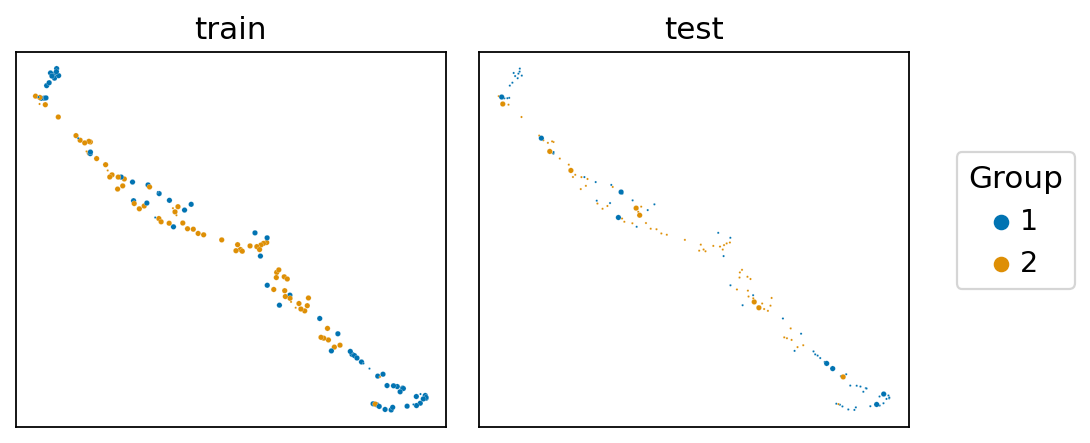

In [42]:
# plotting UMAP of graph embeddings
interpreter.plot_umap_graphs(
    label=group_name,
    data_key=data_key,
    # plt.savefig(dir_figures + f'gcnss_interpretation_umap_graph_{feature_space}.pdf')
)

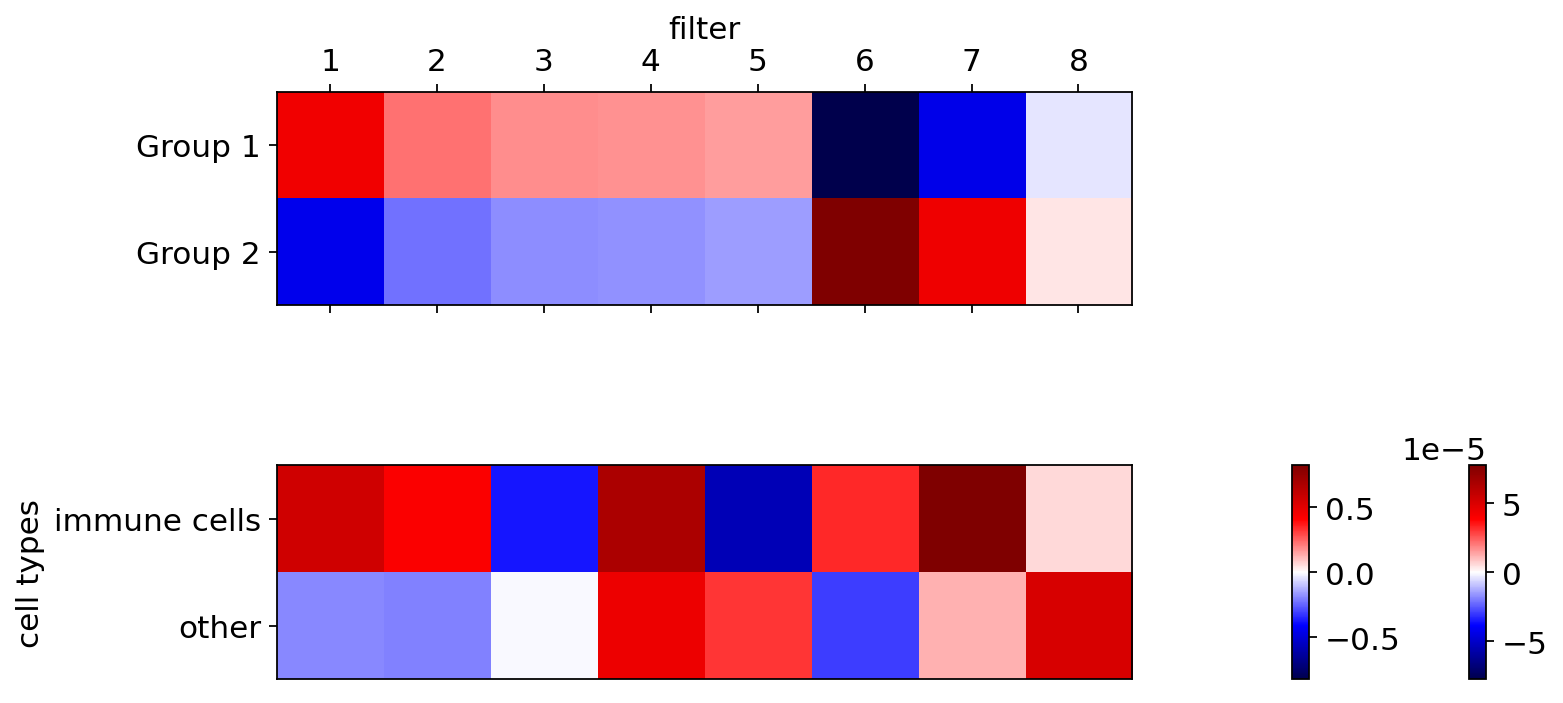

In [43]:
# plotting weight filters for first layer of gcn sorted by groups
interpreter.plot_weight_matrix(
    layer_name='Layer_gcn_0', 
    target_label=group_name,
    panel_width=10,
    panel_height=10,
    # plt.savefig(dir_figures + f'gcnss_interpretation_filters_weights_{feature_space}_fig3c.pdf')
)